# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Data Import and Basic Information 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
df.gender.value_counts()

M    65
F    65
Name: gender, dtype: int64

First, we can have a very basic information investigation for this dataset. This dataset has 3 columns: 'temperature', 'gender', and 'heart_rate' with 130 observations. The lowest and highest temperature are  96.3 F and 100.8 F, respectively with an average of 98.24 F. Additionally, the average heart rate is 73.76 per minute with highest heart rate of 89/min and lowest of 57/min. In these 130 observations, there are 65 males and 65 females.

## 1. Is the distribution of body temperatures normal?

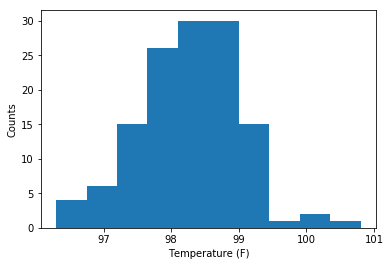

In [6]:
plt.hist(df.temperature, bins = 10)
plt.xlabel('Temperature (F)')
plt.ylabel('Counts')
plt.show()

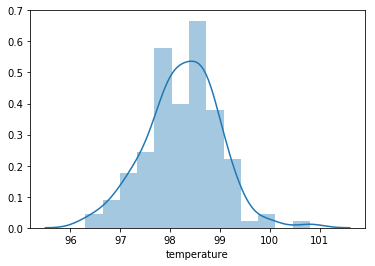

In [7]:
sns.distplot(df.temperature)
plt.show()

From the two figures above, we can roughly see that the distribution for body temperature from this dataset is not perfectly normal distribution. However, this figure has more people in the middle and less people on the 2 sides which is a sign of normal distribution, but it might not be perfect because of the lack of observations. Thus, further investigation is needed to determine.

Thus, I decide to use normaltest method from SciPy to test the temperature distribution.

In [8]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

SciPy's normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value. Given the null hypothesis that body temperature in this datasets came from a normal distribution, and if the pvalue is very small (<0.05 in this case), it means it is unlikely that the data came from a normal distribution. Thus, I can determine that the distribution of body temperatures is normal.

## 2. Is the sample size large? Are the observations independent?

Central Limit Theorem refers to a infinite amount of data. However, in real life, we cannot get infinite number of data. Usually, a dataset with more than 30 observations can shows a bell shape that is very close to normal distribution. There are 130 observations in this case, which is a lot more than 30 observations. Thus, I consider the smaple size is large enough. 

Additionally, human temperature is independent from person to person, so I consider the observations are independent to each other. 

## 3. Is the true population mean really 98.6 degrees F?

Because we only have the sample data with 130 observations, and a mean value of population of 98.6F, I will perform a one-sample test. I will use permutation test, z-test, and t-test to test the sample data. 

Null hypothesis: the avergae of the observations is the same as the population mean.

Alternative hypothesis: the avergae of the observations is different from the population mean. 

### One Sample Permutation Test

In [9]:
population_mean = 98.6

In [10]:
sample = df.temperature
sample.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [11]:
sample_shifted = sample - np.mean(sample) + population_mean
sample_shifted.head()

0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64

In [12]:
def diff_from_population_mean(data, population_mean = 98.6):
    return np.mean(data) - population_mean

In [13]:
diff_obs = diff_from_population_mean(sample)
diff_obs

-0.35076923076921673

In [14]:
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

In [15]:
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [16]:
bs_replicates = draw_bs_reps(sample_shifted, diff_from_population_mean, 10000)
bs_replicates

array([-0.00538462, -0.05461538,  0.04615385, ...,  0.10538462,
       -0.14538462, -0.00692308])

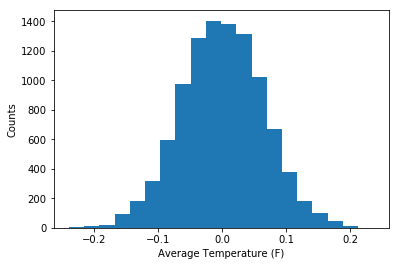

In [17]:
plt.hist(bs_replicates, bins =20)
plt.xlabel('Average Temperature (F)')
plt.ylabel('Counts')
plt.show()

From this figure, we can see that we got a nearly bell shape of the avergae temperature for 10000 randome sample datasets. 

In [18]:
p_value_p = np.sum(bs_replicates <= diff_obs)/len(bs_replicates)
p_value_p

0

After I calculated the p values, which is 0 or nearly 0, I have to reject the null hypothesis, which means that the true population mean is not 98.6 F anymore based on the 130 observations I found and resampling of these 130 observations into 10000 datasets. Next, I will use z-test to confirm this result.

### Z-test

because there are more than 30 observations, we should use z-statistic instead of t-test to calculate the p-value.

In [19]:
mean = np.mean(sample)
std = np.std(sample)
median = np.median(sample)
sample_size = len(sample)

signal=mean-98.6
noise=std/(sample_size**0.5)
z_score=signal/noise
z_score

-5.475925202078116

Since I got the z_score already, I can use the norm.sf(abs(zscore)) * 2 to calculate the p-value for two tailed model.

In [20]:
p_value_z=stats.norm.sf(abs(z_score))*2
p_value_z

4.3523151658821886e-08

Because the p-value is 4.3523151658821886e-08, which is extremely small and nearly 0, this provides the same result as one sample permutaiton test. 

### t-test

Because we have more than 30 observations, so we should use z-test instead of t-test, but here I will use ttest_1sample to run our dataset really quick to check the result.

In [21]:
stats.ttest_1samp(sample, population_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value from t-test is still nearly 0, which can confirm the last two tests as well. 

Therefore, I can reject the null hypothese and be confidently to say that the true population mean is not 98.6 degrees F?

## 4. Draw a small sample of size 10 from the data and repeat both tests.

### permutation test

In [22]:
def bootstrap_replicate_1d_10(data, func):
    bs_sample = np.random.choice(data,10)
    return func(bs_sample)

In [23]:
def draw_bs_reps_10(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d_10(data, func)
    return bs_replicates

In [24]:
bs_replicates_10 = draw_bs_reps_10(sample_shifted, diff_from_population_mean, 10000)
bs_replicates_10

array([ 0.02076923,  0.12076923, -0.55923077, ..., -0.56923077,
       -0.18923077,  0.12076923])

In [25]:
p_value = np.sum(bs_replicates <= diff_obs)/len(bs_replicates)
p_value

0

### z-test

In [26]:
bs_sample_10 = np.random.choice(sample,10)
bs_sample_10

array([ 97.2,  98.1,  97.6,  97.9,  97.7,  97.8,  96.9,  98.4,  97.1,  96.4])

In [27]:
mean_10 = np.mean(bs_sample_10)
std_10 = np.std(bs_sample_10)
median_10 = np.median(bs_sample_10)
sample_size_10 = len(bs_sample_10)

signal_10=mean_10-98.6
noise_10=std_10/(sample_size_10**0.5)
z_score_10=signal_10/noise_10
z_score_10

-6.0102780115078778

In [28]:
p_value_z_10=stats.norm.sf(abs(z_score_10))*2
p_value_z_10

1.8520544925812117e-09

### t-test

In [29]:
stats.ttest_1samp(bs_sample_10, population_mean)

Ttest_1sampResult(statistic=-5.7018503661577773, pvalue=0.0002936195969101519)

Because the resample size is only 10, when we use np.random.choice(), it gave very different p-value every time we run the methods for all three differents tests. I have seen from nearly 1, which does not reject the null, to 0, which reject the null. Thus, the result is very uncertain, which is caused by the very small sample size.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [30]:
CI_low, CI_high = stats.norm.interval(0.95, loc=mean, scale=std)
CI_low, CI_high

(96.81775582674824, 99.680705711713316)

In [31]:
margin_of_error = mean-CI_low
margin_of_error

1.4314749424825379

With 95% confidence, all the body temperature should locate between 95.82F and 99.68 F with a margin of error of 1.43F. The temperature locate outside of the confidence interval, we can consider it as abnormal.

## 6. Is there a significant difference between males and females in normal temperature?

To investigate this question, I separate the dateset into two subsets depends on the gender. First, I made a plot to check if they are similar to each other. Then, I use two sample test to test the the p-values for hypothesis tha the mean temperature for both group is the smae.

In [32]:
male_temperature = df.temperature[df.gender =='M']
female_temperature = df.temperature[df.gender =='F']

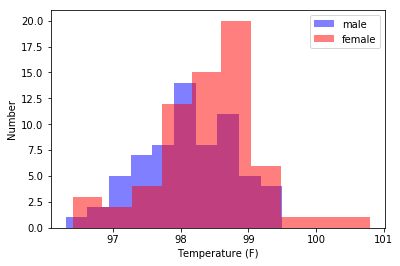

In [33]:
plt.hist(male_temperature, alpha = 0.5, color = 'blue')
plt.hist(female_temperature, alpha = 0.5, color = 'red')
plt.xlabel('Temperature (F)')
plt.ylabel('Number')
plt.legend( ['male','female'])
plt.show()

From the plot, we can see that females seem have higher body temperature than males. For females, most of them have body temperature between 98.5 - 99F, and for males, most of them have body temperature between 98 - 98.3F. 

In [34]:
empirical_diff_means= np.mean(female_temperature)- np.mean(male_temperature)
empirical_diff_means

0.289230769230727

From calculation, we can see that the average body temperature for females is 0.289 F higher than males. 

### Two-Sample Permutation Test

Now because we have 2 independent datasets, so we should use two sample test in order to compare female body temperature and males body temperature.

Null hypothesis: the average female body temperature is the same as male body temperature.

Althernative hypothesis: the average female body temperature is not the same as male body temperature.

In [35]:
bs_replicates_gender = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(sample, size = len(sample))
    bs_replicates_gender[i] = np.mean(bs_sample[:len(female_temperature)]) - np.mean(bs_sample[len(female_temperature):])
bs_replicates_gender

array([ 0.06769231, -0.02923077,  0.00923077, ..., -0.25076923,
        0.01230769, -0.14923077])

In [36]:
p =np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)
p

0

Since the p-value for this two-sample permutation test is 0, I have to reject null hypothesis. This means that females and males have different body temperature.

### t-test

In [37]:
stats.ttest_ind(male_temperature,female_temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p-value from t-test can further prove that gender can affect the body temperature. 

## Conclusion

From this project, I learned how to use plots and normaltest from SciPy to exam if the dataset is normal distribution, as well as the requirements of using Central Limit Theorem. Also, I found that the sample size can highly negatively affect the uncertainity of the tests. Moreover, I separate the data into different genders and used permutation test and t-test to prove that females and males have very different average body temperature. 

Most important findings in this project is that by using one sample permutation test, z-test, and t-test with hypothesis testing. I can identify that the real population body temperature is not 98.6 F. This illustrates that the test Carl Wunderlich did back in 1868 was not accurate enough or maybe the average body temperature of human beings has been increasing from the past 120 years. 